### 1. Download articles automatically from arxiv

In this project, it seems that you already have the info including author and date extracted, but in the future you can use pyarxiv wrapper for the arxiv api

**This will also be relevent for step 3 - we can get all the info we need using this wrapper**


In [1]:
#example is at https://medium.com/analytics-vidhya/geek-harder-using-this-python-arxiv-api-wrapper-ca9003b85b24
from pyarxiv import query, download_entries
from pyarxiv.arxiv_categories import ArxivCategory, arxiv_category_map
import pandas as pd
#Remove warnings from visualizations
import warnings
warnings.filterwarnings('ignore')

#we only want entries for the relevent categories as noted - you can add or remove categories from this list
entries = query(categories = ['astro-ph', 'gr-qc', 'hep-th', 'hep-ph'])

#### Note: arxiv id appears to be the same as url

In [2]:
# Pull title, author, date, link, and id to PDF of paper from "entries"
# and put each in its own list

titles = map(lambda x: x['title'], entries)
authors = map(lambda x: x['authors'], entries)
updated = map(lambda x: x['updated'], entries)
links = map(lambda x: x['link'], entries)
ids = map(lambda x: x['id'], entries)


# Create empty dataframe called "papers"

papers = pd.DataFrame()

# Insert columns into "papers" from the previously created lists

papers['Title'] = pd.Series(titles)
papers['Author'] = pd.Series(authors)
papers['Updated'] = pd.Series(updated)
papers['Link'] = pd.Series(links)
papers['ID'] = pd.Series(ids)



# Slice HH:MM:SS off of each row in date column (only keep date)

papers['Updated'] = papers['Updated'].str.slice(stop = 10)

# Reformat URL string to take user to the PDF of the paper

papers['Link'] = papers['Link'].str.replace("abs", "pdf", case = True)

# Uncomment line of code below to export result as a CSV file

# papers.to_csv('arXiv papers.csv')

# Sort dataframe in descending order by date

papers.sort_values(by = 'Updated', ascending = False).reset_index(drop = True).head(20)

Title  \
0                    Braneworld models of dark energy   
1   Topological defects: A problem for cyclic univ...   
2   On the estimation of the current value of the ...   
3   Cosmological Acceleration Through Transition t...   
4   Cosmology with Self-Adjusting Vacuum Energy De...   
5   Spintessence! New Models for Dark Matter and D...   
6   Non-Gaussian Signatures in the Cosmic Backgrou...   
7   Cardassian Expansion: a Model in which the Uni...   
8   Non-vacuum initial states for the cosmological...   
9                    Cosmology with Varying Constants   
10                         Photon mass from inflation   
11  Supernovae, CMB, and Gravitational Leakage int...   
12  Measuring $α$ in the Early Universe: CMB Tempe...   
13  Varying $α$ in the early universe: CMB, LSS an...   
14  Modified Newtonian Dynamics as an Alternative ...   
15                   On the Dyadosphere of Black Hole   
16                When can preheating affect the CMB?   
17  Fluctuation Spectrum from a Scalar-Tensor Bime...   
18  Non-singular big-bounces and evolution of line...   
19  Microscopic Black Holes as a Source of Ultrahi...   

                                               Author     Updated  \
0   [{'name': 'Varun Sahni'}, {'name': 'Yuri Shtan...  2003-12-09   
1   [{'name': 'P. P. Avelino'}, {'name': 'C. J. A....  2003-08-31   
2   [{'name': 'V. G. Gurzadyan'}, {'name': 'She-Sh...  2003-02-11   
3   [{'name': 'Leonard Parker'}, {'name': 'William...  2003-01-23   
4     [{'name': 'A. Bonanno'}, {'name': 'M. Reuter'}]  2002-10-15   
5   [{'name': 'Latham A. Boyle'}, {'name': 'Robert...  2002-09-17   
6   [{'name': 'S. Gupta'}, {'name': 'A. Berera'}, ...  2002-06-28   
7   [{'name': 'Katherine Freese'}, {'name': 'Matth...  2002-06-18   
8   [{'name': 'Alejandro Gangui'}, {'name': 'Jerom...  2002-06-03   
9                   [{'name': 'C. J. A. P. Martins'}]  2002-05-29   
10  [{'name': 'Tomislav Prokopec'}, {'name': 'Ola ...  2002-05-20   
11  [{'name': 'Cédric Deffayet'}, {'name': 'Susana...  2002-05-15   
12  [{'name': 'C. J. A. P. Martins'}, {'name': 'A....  2002-05-10   
13                  [{'name': 'C. J. A. P. Martins'}]  2002-05-06   
14  [{'name': 'Robert H. Sanders'}, {'name': 'Stac...  2002-04-30   
15  [{'name': 'Giuliano Preparata'}, {'name': 'Rem...  2002-04-04   
16  [{'name': 'Shinji Tsujikawa'}, {'name': 'Bruce...  2002-04-02   
17  [{'name': 'M. A. Clayton'}, {'name': 'J. W. Mo...  2002-03-11   
18         [{'name': 'J. Hwang'}, {'name': 'H. Noh'}]  2002-03-06   
19  [{'name': 'Roberto Casadio'}, {'name': 'Benjam...  2002-02-28   

                                       Link  \
0   http://arxiv.org/pdf/astro-ph/0202346v3   
1   http://arxiv.org/pdf/astro-ph/0206287v2   
2   http://arxiv.org/pdf/astro-ph/0105245v3   
3   http://arxiv.org/pdf/astro-ph/0206488v3   
4   http://arxiv.org/pdf/astro-ph/0106468v2   
5   http://arxiv.org/pdf/astro-ph/0105318v2   
6   http://arxiv.org/pdf/astro-ph/0205152v2   
7   http://arxiv.org/pdf/astro-ph/0201229v2   
8   http://arxiv.org/pdf/astro-ph/0206023v1   
9   http://arxiv.org/pdf/astro-ph/0205504v1   
10  http://arxiv.org/pdf/astro-ph/0205331v1   
11  http://arxiv.org/pdf/astro-ph/0201164v2   
12  http://arxiv.org/pdf/astro-ph/0203149v2   
13  http://arxiv.org/pdf/astro-ph/0205079v1   
14  http://arxiv.org/pdf/astro-ph/0204521v1   
15  http://arxiv.org/pdf/astro-ph/0204080v1   
16  http://arxiv.org/pdf/astro-ph/0204031v1   
17  http://arxiv.org/pdf/astro-ph/0203164v1   
18  http://arxiv.org/pdf/astro-ph/0112079v2   
19  http://arxiv.org/pdf/astro-ph/0202513v1   

                                         ID  
0   http://arxiv.org/abs/astro-ph/0202346v3  
1   http://arxiv.org/abs/astro-ph/0206287v2  
2   http://arxiv.org/abs/astro-ph/0105245v3  
3   http://arxiv.org/abs/astro-ph/0206488v3  
4   http://arxiv.org/abs/astro-ph/0106468v2  
5   http://arxiv.org/abs/astro-ph/0105318v2  
6   http://arxiv.org/abs/astro-ph/0205152v2  
7   http://arxiv.org/abs/astro-ph/0201229v2 

## 2. Establish an algorithm able to recognize if an article talks about a model or not

### if an articles contains “y>x” iterations of a model, it can be considered to talk about the latter.
(keep all for now because we're not sure how many iterations minimum we want)

In [3]:
import pdftotext
from six.moves.urllib.request import urlopen
import io
from collections import Counter

In [4]:
df = pd.read_csv('data5.csv',delimiter=',',encoding= 'unicode_escape')

In [72]:
#test one pdf in dataset to make sure it's read in correctly
#url = df.pdf[3]
#remote_file = urlopen(url).read()
memory_file = io.BytesIO(remote_file)

pdf = pdftotext.PDF(memory_file)
text = "\n\n".join(pdf)

print(text)

                                       ROTATING ASTROPHYSICAL SYSTEMS AND A GAUGE THEORY
                                                      APPROACH TO GRAVITY


                                                  A.N. Lasenby, C.J.L. Doran, Y. Dabrowski and A.D. Challinor.
                                                         MRAO, Cavendish Laboratory, Madingley Road,
                                                                   Cambridge CB3 0HE, U.K.

                                              We discuss three applications of a gauge theory of gravity to rotating as-
arXiv:astro-ph/9707165v1 15 Jul 1997




                                              trophysical systems. The theory employs gauge fields in a flat Minkowski
                                              background spacetime to describe gravitational interactions. The iron fluo-
                                              rescence line observed in AGN is discussed, assuming that the line originates
    

#### initialize df that stores salient info and text of article

In [6]:
sorted_df = pd.DataFrame(columns=['pdf','dict', 'text'])

In [ ]:
index = 0
count_fail = 0

for url in df.pdf:
    try:
        remote_file = urlopen(url).read()
        memory_file = io.BytesIO(remote_file)
        pdf = pdftotext.PDF(memory_file)
        text = "\n\n".join(pdf)
        index += 1
        #print(url)
        print(index)
        d = {'Einstein-Gauss-Bonnet': 0, 'EGB':0, 'Gauss-Bonnet': 0,'GB': 0, 'Horndeski': 0, 'Chameleon': 0, 'Tachyacoustic': 0, 'Mimetic gravity': 0, 'MG': 0, 'Massive gravity': 0, 'Dirac-Born-Infeld': 0, 'DBI': 0, 'k-essence': 0, 'Einstein-Cartan': 0, 'EC':0, 'Einstein-Cartan-Sciama-Kibble':0, 'ECSK': 0, 'Einstein-Cartan-Kibble-Sciama':0, 'ECKS': 0, 'Mirage cosmology': 0, 'String gas': 0, 'Unimodular': 0, 'Lee-Wick': 0, 'LW': 0,'Ekpyrotic': 0, 'Loop Quantum Cosmology': 0, 'LQC':0, 'Spinfoam Cosmology': 0, 'SC':0, 'Bouncing cosmology': 0, 'Bouncing universe': 0,'$f(R)$ gravity': 0, '$f(R)$ cosmology': 0, 'the': 0}
        for keyword in d:
            d[keyword] = d.get(keyword, 0) + text.count(keyword)
        sorted_df = sorted_df.append({'pdf' : url, 'dict': d, 'text':text}, ignore_index=True)    
    except:
        #print("entered except")
        count_fail += 1
        #print(index)
        pass

In [76]:
#this is to make the dictionary col into separate columns
final_df = pd.concat([sorted_df.drop(['dict'], axis=1), sorted_df['dict'].apply(pd.Series)], axis=1)

In [77]:
final_df.head()

pdf  \
0  http://arxiv.org/pdf/astro-ph/9510143v1.pdf   
1  http://arxiv.org/pdf/astro-ph/9501012v1.pdf   
2  http://arxiv.org/pdf/astro-ph/9603126v1.pdf   
3  http://arxiv.org/pdf/astro-ph/9707165v1.pdf   
4  http://arxiv.org/pdf/astro-ph/9710185v2.pdf   

                                                text  Einstein-Gauss-Bonnet  \
0                                         Mon. No...                      0   
1                                        COBE con...                      0   
2                                                ...                      0   
3                                         ROTATIN...                      0   
4                                         Mon. No...                      0   

   EGB  Gauss-Bonnet  GB  Horndeski  Chameleon  Tachyacoustic  \
0    0             0   0          0          0              0   
1    0             0   0          0          0              0   
2    0             0   0          0          0              0   
3    0             0   0          0          0              0   
4    0             0   0          0          0              0   

   Mimetic gravity  ...  Ekpyrotic  Loop Quantum Cosmology  LQC  \
0                0  ...          0                       0    0   
1                0  ...          0                       0    0   
2                0  ...          0                       0    0   
3                0  ...          0                       0    0   
4                0  ...          0                       0    0   

   Spinfoam Cosmology  SC  Bouncing cosmology  Bouncing universe  \
0                   0   2                   0                  0   
1                   0   0                   0                  0   
2                   0   0                   0                  0   
3                   0   0                   0                  0   
4                   0   0                   0                  0   

   $f(R)$ gravity  $f(R)$ cosmology  the  
0               0                 0  590  
1               0                 0  277  
2               0                 0   62  
3               0                 0  627  
4               0                 0  596  

[5 rows x 36 columns]

## 3. Extract information concerning the articles.

As mentioned in part 1, the dataset already has most of the information but in the future the wrapper has that information as well. for now, we merge the datasets to retrieve the article info we had from the beggining

In [78]:
import numpy as np

#replace 0 with na
final_df = final_df.replace(0, pd.np.nan)

In [79]:
#drop rows where there aren't at least 4 non na values (id cols and "the" test col are always non na)
#this will give us articles that have at least one mention of one of the models in question
final_df = final_df.dropna(thresh=4)

In [80]:
#get author and date info from original df - in the future the api wrapper will have this info
merged_df = pd.merge(df, final_df, on="pdf")

In [81]:
#drop unnessary columns
df2 = merged_df.drop(['Unnamed: 0','pdf', 'src', 'bow', 'kw', 'the'], axis=1)

In [82]:
df2.head()

cat                                     authors             published  \
0  astro-ph         ['F. P. Pijpers', 'M. J. Thompson']  1995-10-27T10:05:48Z   
1  astro-ph                ['S. Kubis', 'M. Kutschera']  1996-03-23T13:33:00Z   
2  astro-ph  ['Jens Schmalzing', 'Krzysztof M. Gorski']  1997-10-16T18:07:43Z   
3  astro-ph                         ['Gaspard Duchene']  1998-10-30T17:27:52Z   
4  astro-ph   ['C. Sivaram', 'L. C. Garcia de Andrade']  1998-11-07T18:57:10Z   

                                               title  \
0  A modified R1 X R1 method for helioseismic rot...   
1  Comment on "Brown Dwarfs, Quark Stars, and Qua...   
2  Minkowski Functionals used in the Morphologica...   
3  Binary fraction in low-mass star forming regio...   
4  Torsion modified Plasma Screening in Astrophysics   

                                       url  \
0  http://arxiv.org/abs/astro-ph/9510143v1   
1  http://arxiv.org/abs/astro-ph/9603126v1   
2  http://arxiv.org/abs/astro-ph/9710185v2   
3  http://arxiv.org/abs/astro-ph/9810507v1   
4  http://arxiv.org/abs/astro-ph/9811116v1   

                                                text  Einstein-Gauss-Bonnet  \
0                                         Mon. No...                    NaN   
1                                                ...                    NaN   
2                                         Mon. No...                    NaN   
3                                         A&A man...                    NaN   
4                                           Torsi...                    NaN   

   EGB  Gauss-Bonnet  GB  ...  LW  Ekpyrotic  Loop Quantum Cosmology  LQC  \
0  NaN           NaN NaN  ... NaN        NaN                     NaN  NaN   
1  NaN           NaN NaN  ... NaN        NaN                     NaN  NaN   
2  NaN           NaN NaN  ... NaN        NaN                     NaN  NaN   
3  NaN           NaN NaN  ... NaN        NaN                     NaN  NaN   
4  NaN           NaN NaN  ... NaN        NaN                     NaN  NaN   

   Spinfoam Cosmology   SC  Bouncing cosmology  Bouncing universe  \
0                 NaN  2.0                 NaN                NaN   
1                 NaN  NaN                 NaN                NaN   
2                 NaN  NaN                 NaN                NaN   
3                 NaN  NaN                 NaN                NaN   
4                 NaN  NaN                 NaN                NaN   

   $f(R)$ gravity  $f(R)$ cosmology  
0             NaN               NaN  
1             NaN               NaN  
2             NaN               NaN  
3             NaN               NaN  
4             NaN               NaN  

[5 rows x 39 columns]

### In addition to literal categorization - nlp to find common paired words

In [83]:
# source: https://towardsdatascience.com/extracting-taxonomic-data-from-a-journal-articles-using-natural-language-processing-ab794d048da9

import PyPDF2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re

This creates a variable for the plain text of the 3rd article in our dataframe. if you want to look at a different article, you can just change the number to indicate the article you wish to study

In [84]:
read_output = '\n'.join(df2.text[2]).strip().replace('\n','')

In [85]:
#clean text for analysis
#this gets rid of symbols and common stop words

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
SHORTWORD = re.compile(r'\W*\b\w{1,3}\b')

stop_words_lst = ['data','performed using']

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = str(text).lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = re.sub(r'\b[a-zA-Z]\b','',str(text))
    text = re.sub('\d+','',text) 
    text = SHORTWORD.sub('',text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    for w in stop_words_lst:
        pattern = r'\b'+w+r'\b'
        text = re.sub(pattern, '', str(text))

    return text

by tokenizing the article and extracting the common bigrams and trigrams, we can extract themes and key terms from the article without setting any parameters beforehand. We see that this article talks a lot about minkowski functionals and euler characteristic but we weren't looking for that information beforehand. 

In [86]:
#Tokenizing and Extracting using TFIDF
pdf_o = clean_text(read_output)
text_tokens = word_tokenize(pdf_o)

pdf_i=[pdf_o]

# Getting bigrams and trigrams
vectorizer = CountVectorizer(ngram_range =(2, 3))
X1 = vectorizer.fit_transform(pdf_i)
features = (vectorizer.get_feature_names())

X2 = vectorizer.fit_transform(pdf_i)
scores = (X2.toarray())

sums = X2.sum(axis = 0)
data1 = []
for col, term in enumerate(features):
    data1.append( (term, sums[0, col] ))
ranking = pd.DataFrame(data1, columns = ['term', 'rank'])
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords : \n", words.head(50))



Words : 
                                    term  rank
3744              minkowski functionals    52
4639                       random field    21
1900               euler characteristic    15
2702                    gaussian random    13
2703              gaussian random field    12
3284          jens schmalzing krzysztof     8
3047                incomplete coverage     8
3283                    jens schmalzing     8
4459                     power spectrum     8
5027               schmalzing krzysztof     8
3136                  integral geometry     8
3706               microwave background     7
2735                 geodesic curvature     7
2565                   functionals maps     6
1194                   cosmic microwave     6
2237                       figure shows     6
1195        cosmic microwave background     6
3812        mnras minkowski functionals     6
3245                 isodensity contour     6
2695                    gaussian filter     6
3811                  

### we can also create a wordcloud of the most common words in this article

We can see below that minkowski functional and guassian random still stand out in the chart as they did in the table

Note: in order to change which article to visualize, scroll back up to where "read_output" is defined in this section. simple change the value "2" in df2.text[2] to whichever article you wish to examine further. 

In [88]:
from wordcloud import WordCloud 

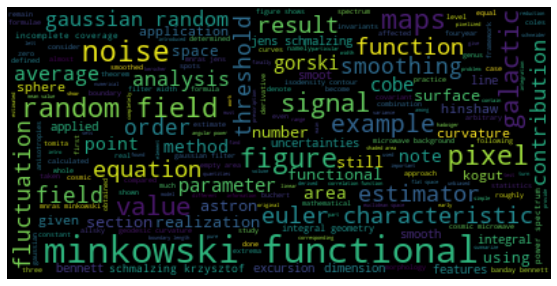

In [91]:
#increase figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

# Start with the article I chose for finding common bigrams and trigrams in above cells - 3rd in df.
text = pdf_o

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

begin to extract author specific info

In [92]:
#this prints all our key terms and models in the dataset
df2.iloc[:,6:].columns.tolist()

['Einstein-Gauss-Bonnet',
 'EGB',
 'Gauss-Bonnet',
 'GB',
 'Horndeski',
 'Chameleon',
 'Tachyacoustic',
 'Mimetic gravity',
 'MG',
 'Massive gravity',
 'Dirac-Born-Infeld',
 'DBI',
 'k-essence',
 'Einstein-Cartan',
 'EC',
 'Einstein-Cartan-Sciama-Kibble',
 'ECSK',
 'Einstein-Cartan-Kibble-Sciama',
 'ECKS',
 'Mirage cosmology',
 'String gas',
 'Unimodular',
 'Lee-Wick',
 'LW',
 'Ekpyrotic',
 'Loop Quantum Cosmology',
 'LQC',
 'Spinfoam Cosmology',
 'SC',
 'Bouncing cosmology',
 'Bouncing universe',
 '$f(R)$ gravity',
 '$f(R)$ cosmology']

In [94]:
import shlex
#create dictionary of authors with value indicating how many articles they appeared in
d1 = {}
i = 0
while i < len(df2.authors):
    authors = shlex.shlex(df2.authors[i], posix=True)
    authors.whitespace += ','
    authors.whitespace_split = True
    authors = list(authors)
    for author in authors:
        author = author.replace('[', '') 
        author = author.replace(']', '')
        author.strip()
        #print(author)
        d1[author] = d1.get(author, 0) + 1
    i += 1



first we will find the most commonly cited authors in the whole dataset

we can see that Andrade was cited 55 times

In [ ]:
#sort authors in descending number of articles
#the for loop prints all the author names but the dataframe below just prints top 5. if you want to see more you can print the for loop or adjust the .head() function below.
sort_d1 = sorted(d1.items(), key=lambda x: x[1], reverse=True)

#for i in sort_d1:
	#print(i[0], i[1])

In [96]:
#top 5 most cited authors in whole df
pd.DataFrame.from_dict(sort_d1).head()

0   1
0  L. C. Garcia de Andrade  56
1          Martin Bojowald  56
2             Rong-Gen Cai  52
3            Yun Soo Myung  52
4        Ratbay Myrzakulov  37

## 4. More Information

### how many articles a given author published concerning a particular cosmological model.



In [97]:
#create function that returns top 5 most cited authors for model and number of articles referencing model
def model_info(model):
  # Add both the parameters and return them."
    df = df2.loc[df2[model].notna()]
    d1 = {}
    i = 0
    while i < len(df.authors):
        authors = shlex.shlex(df.authors.tolist()[i], posix=True)
        authors.whitespace += ','
        authors.whitespace_split = True
        authors = list(authors)
        for author in authors:
            author = author.replace('[', '') 
            author = author.replace(']', '')
            author.strip()
            #print(author)
            d1[author] = d1.get(author, 0) + 1
            sort_d1 = sorted(d1.items(), key=lambda x: x[1], reverse=True)
        i += 1
    #return pd.DataFrame.from_dict(sort_d1).head();
    print("Top 5 authors for model: ")
    print(pd.DataFrame.from_dict(sort_d1).head())
    print("____________________")
    print("Number of articles referencing this model: ")
    print(df.shape[0])

In [98]:
model_info('Einstein-Gauss-Bonnet')

Top 5 authors for model: 
                   0   1
0   Sushant G. Ghosh  20
1         Jutta Kunz  20
2       Hideki Maeda  14
3   Sunil D. Maharaj  14
4  Burkhard Kleihaus  14
____________________
Number of articles referencing this model: 
729


### Visualization of frequency of mentions of models

look at just full model names total mentions over the years in a heat map

In [103]:
#create pivot table of years versus total mentions of model
df2_1 = df2.fillna(0)
df2_1['year'] = pd.DatetimeIndex(df2_1['published']).year
df2_1 = df2_1.iloc[:,6:].astype(int)
heat_df = df2_1.pivot_table(
    index=["year"],
    values=['Einstein-Gauss-Bonnet',
 'Horndeski',
 'Chameleon',
 'Tachyacoustic',
 'Mimetic gravity',
 'Massive gravity',
 'Dirac-Born-Infeld',
 'k-essence',
 'Einstein-Cartan',
 'Einstein-Cartan-Sciama-Kibble',
 'Einstein-Cartan-Kibble-Sciama',
 'Mirage cosmology',
 'String gas',
 'Unimodular',
 'Lee-Wick',
 'Ekpyrotic',
 'Loop Quantum Cosmology',
 'Spinfoam Cosmology',
 'Bouncing cosmology',
 'Bouncing universe'],
    fill_value=0,
    aggfunc=[np.sum],
)
#get rid of "sum" index in pivot df
heat_df.columns = heat_df.columns.get_level_values(1)

#### we can see that most of the models had more mentions in later years and by far the most mentioned overall was Horndeski - and if a model was mentioned it was usually less than 100 times

In [105]:
heat_df

Bouncing cosmology  Bouncing universe  Chameleon  Dirac-Born-Infeld  \
year                                                                        
1991                   0                  0          0                  0   
1992                   0                  0          0                  0   
1993                   0                  0          0                  0   
1994                   0                  0          0                  0   
1995                   0                  0          0                  0   
1996                   0                  0          0                 25   
1997                   0                  0          0                 22   
1998                   0                  0         13                 83   
1999                   0                  0          4                141   
2000                   0                  0          4                140   
2001                   0                  0          0                 96   
2002                   0                  1          0                 88   
2003                   0                  0          0                100   
2004                   0                  3         11                148   
2005                   0                  0          0                141   
2006                   0                  0         43                101   
2007                   0                  1         63                108   
2008                   0                  3         34                118   
2009                  11                  2         16                 85   
2010                   0                  2         37                 67   
2011                   0                  2        114                112   
2012                   1                  2         22                 69   
2013                   0                  2         21                 65   
2014                   1                  2         55                 70   
2015                   1                  3         76                 70   
2016                   1                  1         90                 91   
2017                   3                  8         35                 42   
2018                   6                  3         52                 40   
2019                   1                  5         12                 12   
2020                   2                  3         15                  3   

      Einstein-Cartan  Einstein-Cartan-Kibble-Sciama  \
year                                                   
1991                4                              0   
1992                6                              0   
1993               23                              0   
1994               20                              0   
1995               20                              0   
1996               32                              0   
1997               42                              0   
1998               56                              0   
1999               82                              1   
2000              136                              0   
2001              115                              0   
2002               82                              0   
2003               68                              7   
2004               36                              0   
2005               51                              0   
2006              115                              0   
2007              145                              0   
2008               92                              0   
2009              120                              0   
2010               65                              0   
2011              115                              0   
2012              126                              0   
2013              120                              0   
2014              103                              1   
2015               96                              2   
2016              173        

<AxesSubplot:ylabel='year'>

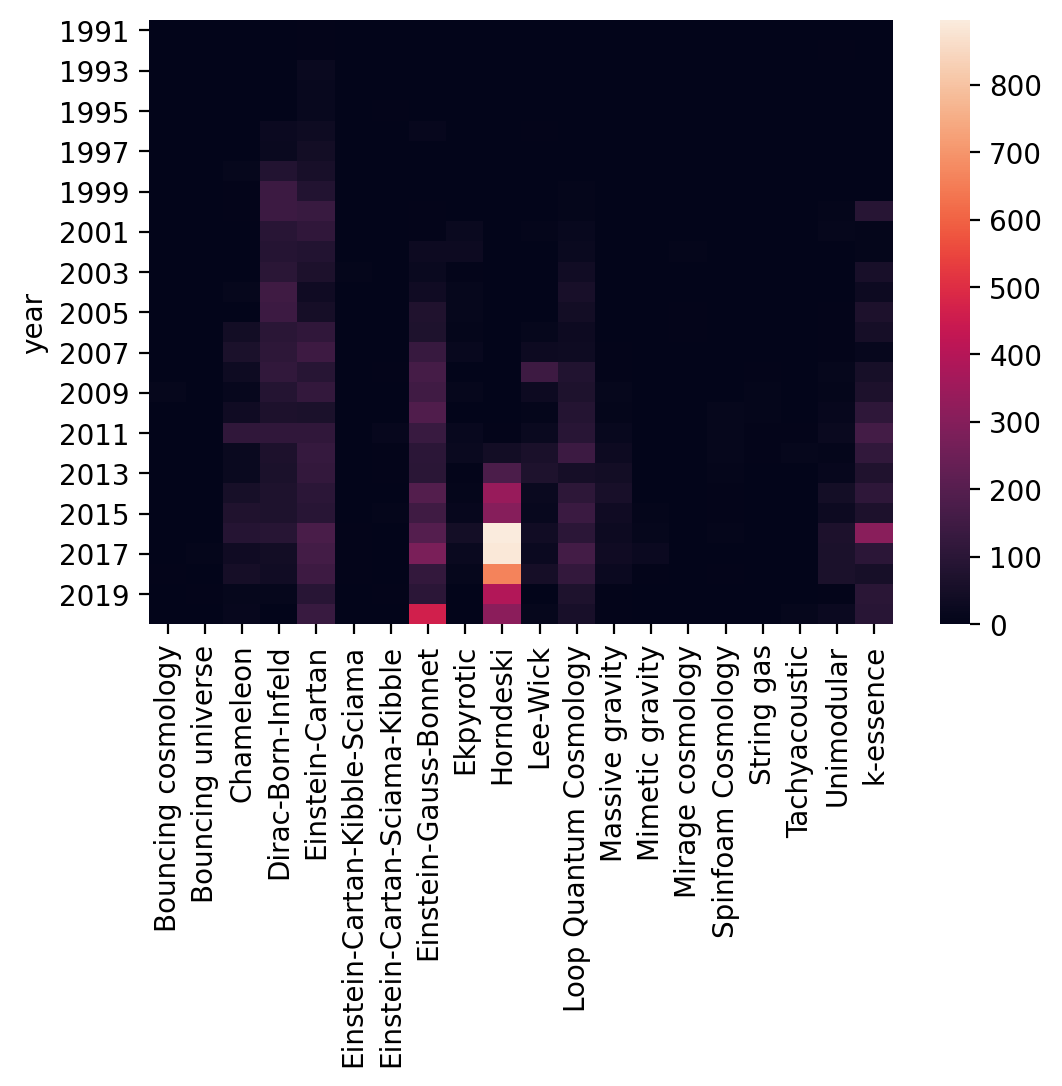

In [106]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

sns.heatmap(heat_df, annot=False)

#### function that returns number of articles with that model and total number of mentions per year
(same info as histogram but in a table)

In [108]:
def model_table(model):
    dff = df2.loc[df2[model].notna()]
    dff['published'] = pd.to_datetime(dff['published'])
    dff[model] = dff[model].astype(int)
    dff['year'] = pd.DatetimeIndex(dff['published']).year
    a =dff.pivot_table(
        index=["year"],
        values=[model],
        fill_value=0,
        aggfunc=[len, np.sum],
    )
    print(a.rename(columns={'len': 'number of articles with ', 'sum': 'number of mentions with ', }))

#### upon closer inspection of the Horndeski model over the years, we see that although it was mentioned almost 1000 times in both 2016 and 2017, those years equated to approximately 80 total articles mentioning that model. Still a lot quantitatively. 

In [109]:
model_table('Horndeski')

     number of articles with  number of mentions with 
                    Horndeski                Horndeski
year                                                  
2008                        1                        2
2009                        1                        1
2011                        3                        5
2012                       10                       43
2013                       15                      177
2014                       35                      340
2015                       48                      303
2016                       79                      895
2017                       82                      885
2018                       77                      663
2019                       37                      393
2020                       59                      312


#### Histogram of the papers published concerning a given model along the years. for example - lee wick model

this function allows mouse hovering on histogram to see how many mentions were in each article within that year. The plot doesn't display unless you rerun the code in jupyter. I attached a png in the cell to show what it looks like and created a secondary function that plots the histograms without interactivity.

In [112]:
import plotly.express as px
#create function that plots histogram of articles published with given model over the years stacked by number of times model is mentioned in one article
def model_hist(model):
    dff = df2.loc[df2[model].notna()]
    dff['published'] = pd.to_datetime(dff['published'])
    dff[model] = dff[model].astype(int)
    dff['year'] = pd.DatetimeIndex(dff['published']).year
    fig = px.bar(dff, x='year', y=model)
    fig.show()


In [113]:
model_hist('Lee-Wick')

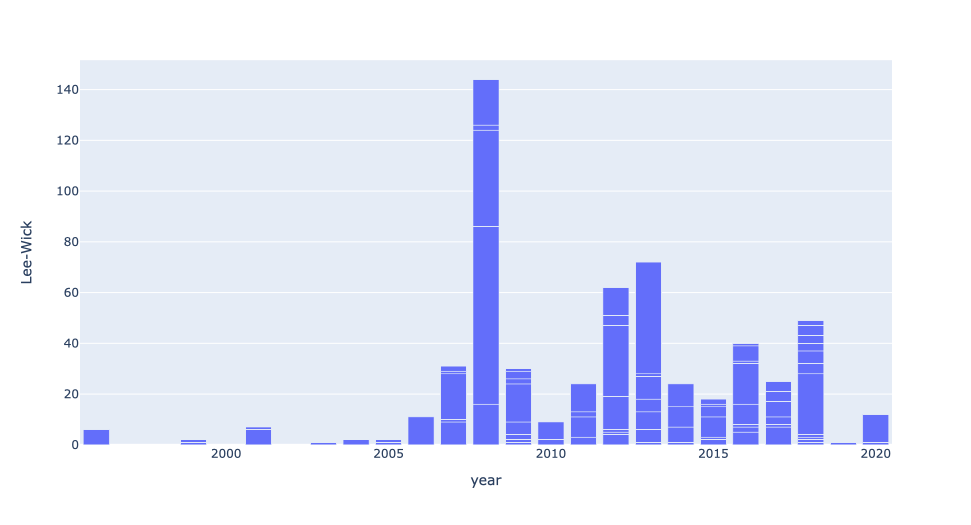

#### This function just creates a flat visual of models over time. you can't interact with these visuals. 

In [188]:
import matplotlib
matplotlib.style.use('ggplot')
#import matplotlib.pyplot as plt

#also histogram - but with no hover options - just flat
def model_hist_flat(model):

    dff = df2.loc[df2[model].notna()]
    dff['published'] = pd.to_datetime(dff['published'])
    dff[model] = dff[model].astype(int)
    dff['year'] = pd.DatetimeIndex(dff['published']).year
    a =dff.pivot_table(
        index=["year"],
        values=[model],
        fill_value=0,
        aggfunc=[np.sum],
    )
    a.columns = a.columns.droplevel(0)
    a = a.reset_index().rename_axis(None, axis=1)
    a.set_index(["year"],inplace=True)
    a.plot(kind='bar',alpha=0.75, rot=90)
    plt.xlabel("")
    plt.show()



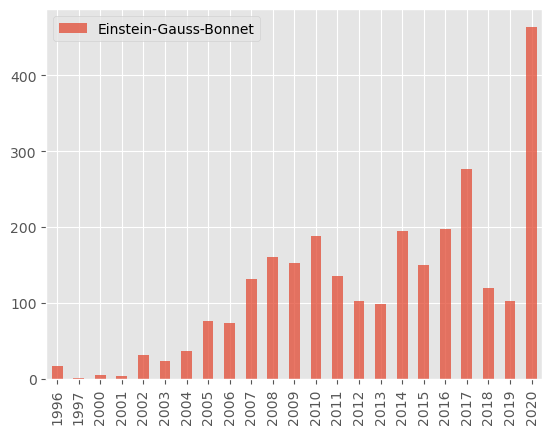

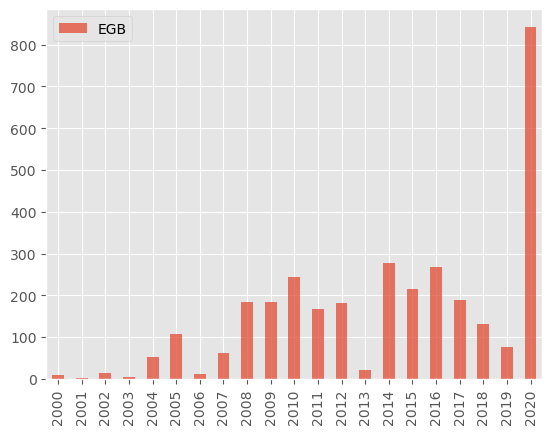

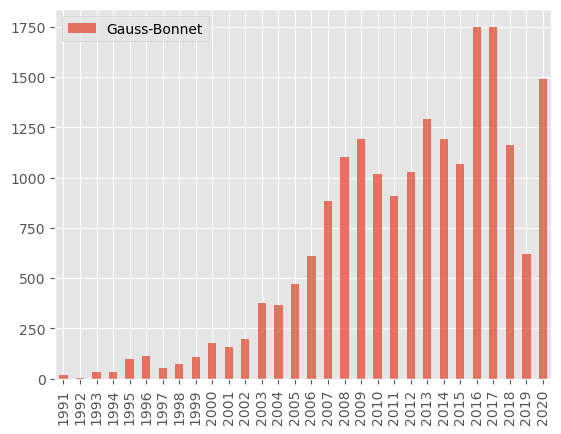

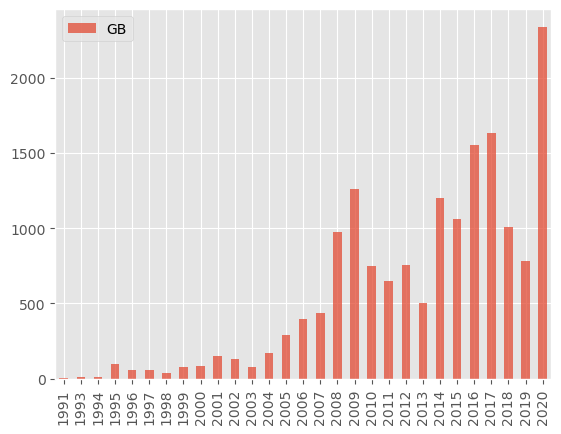

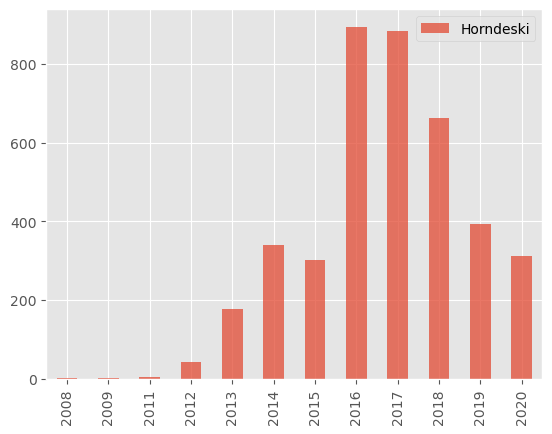

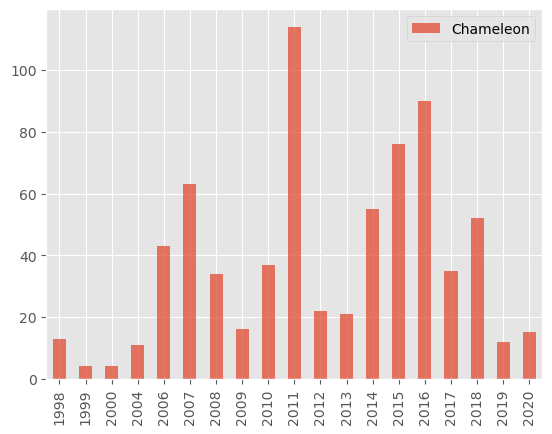

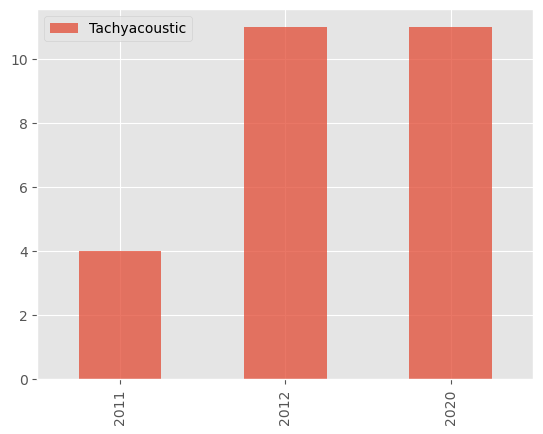

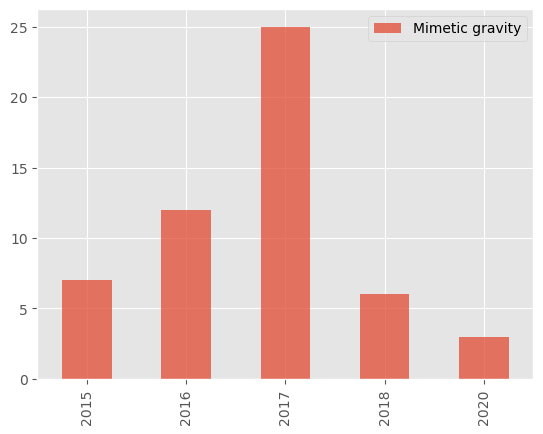

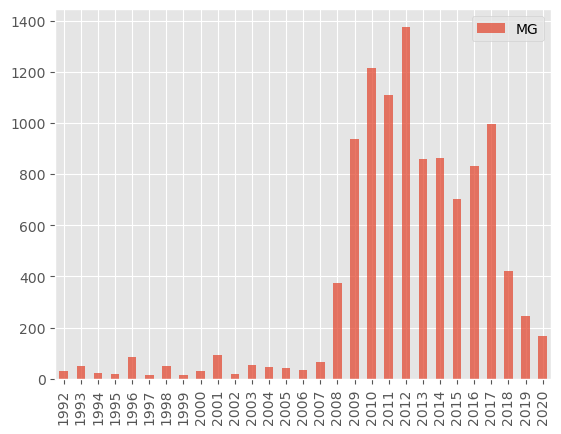

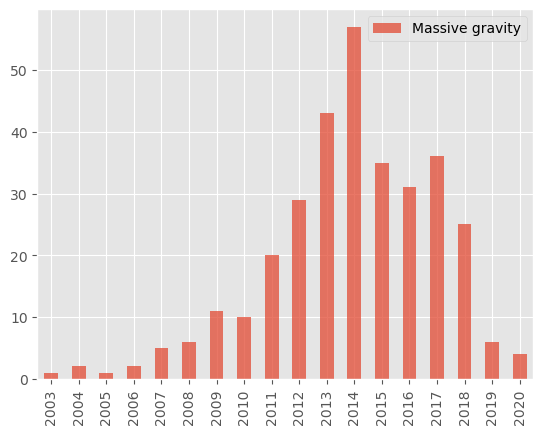

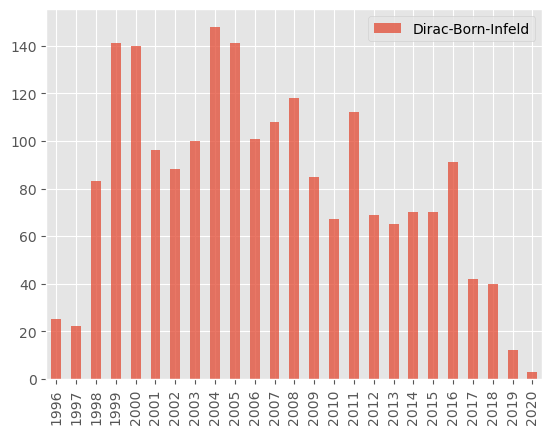

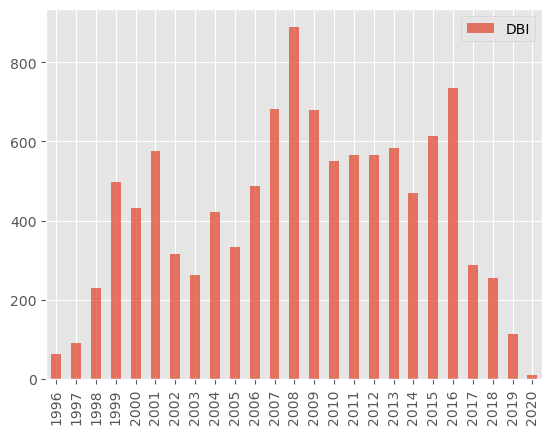

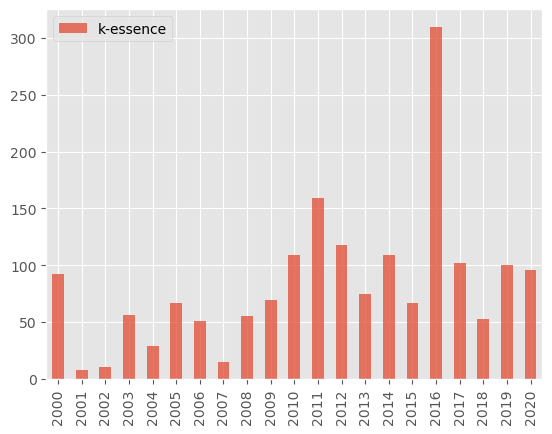

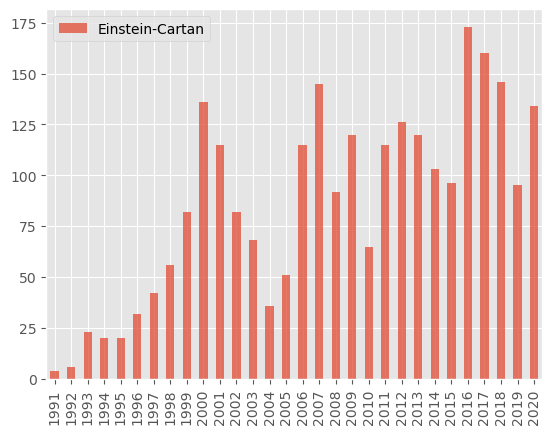

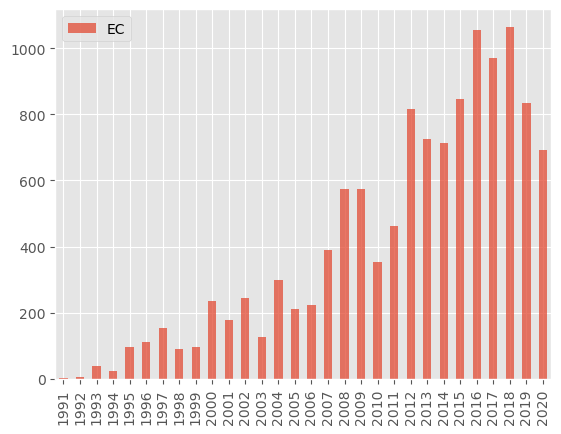

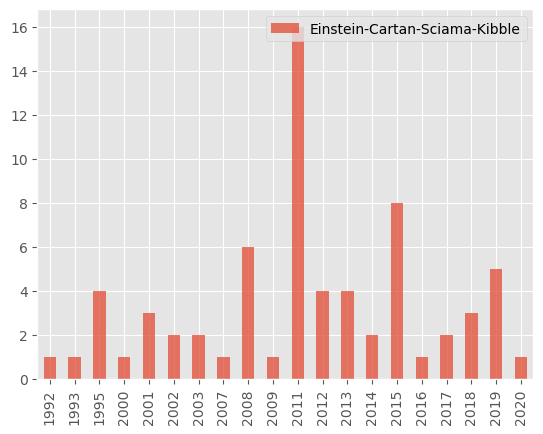

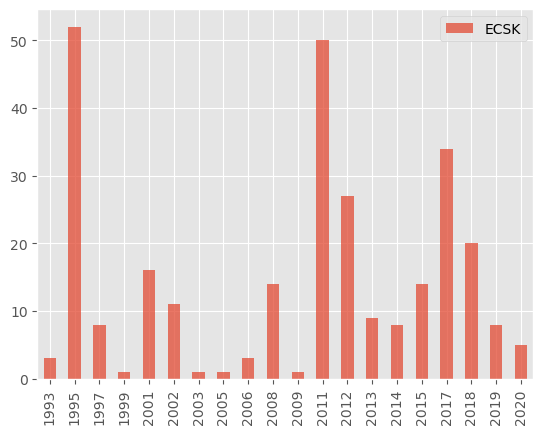

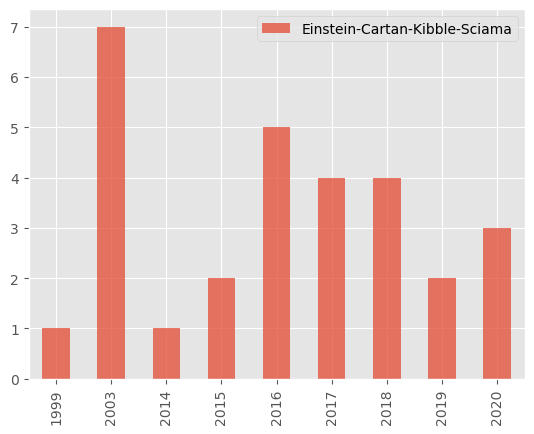

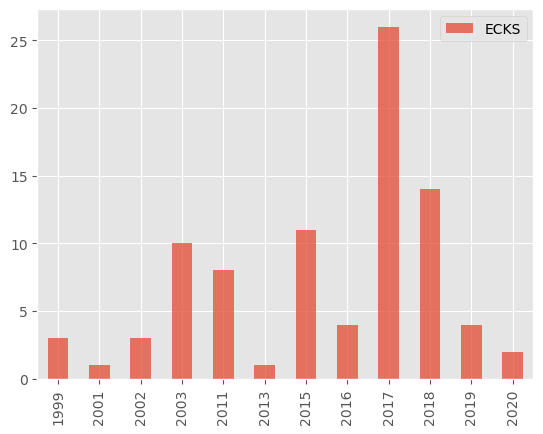

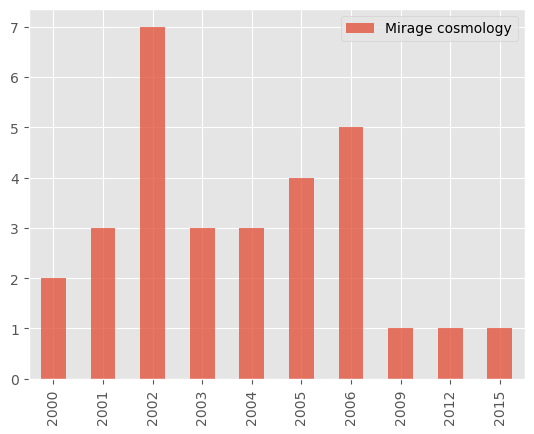

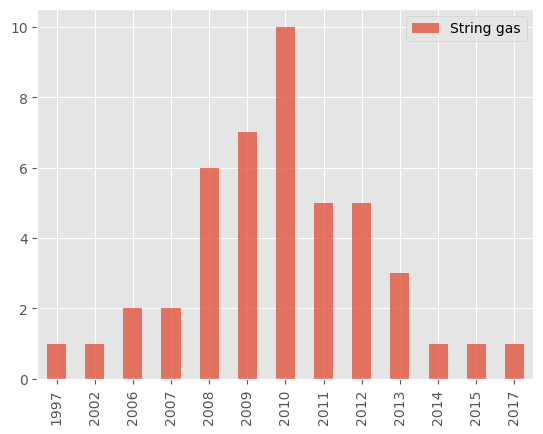

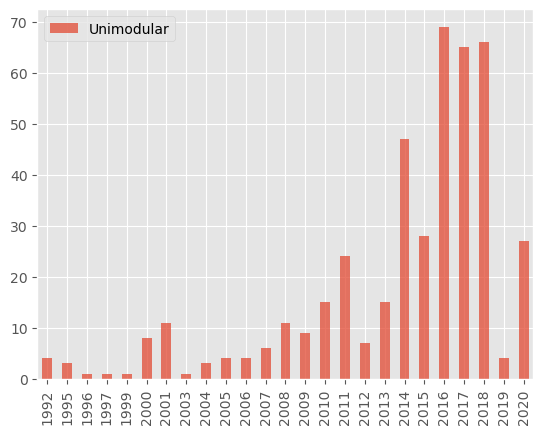

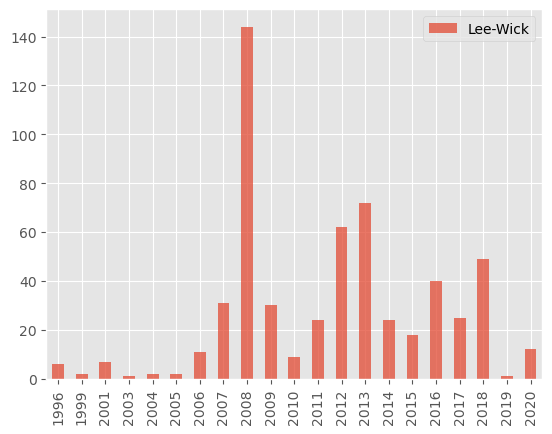

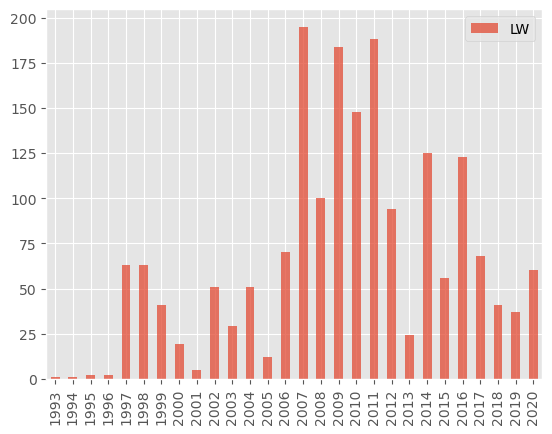

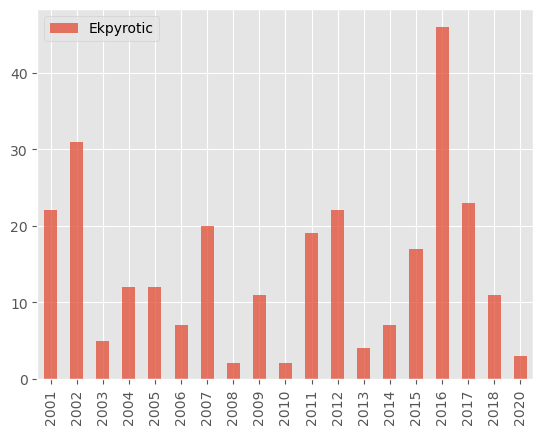

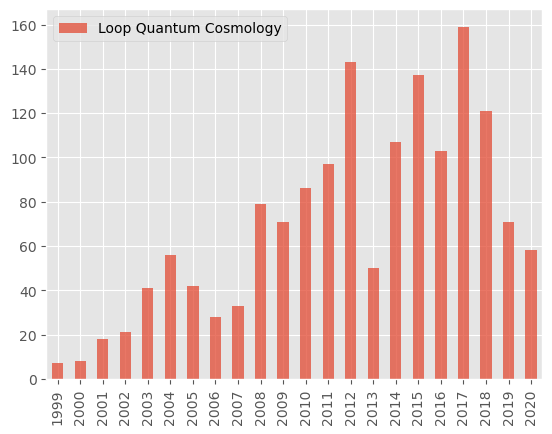

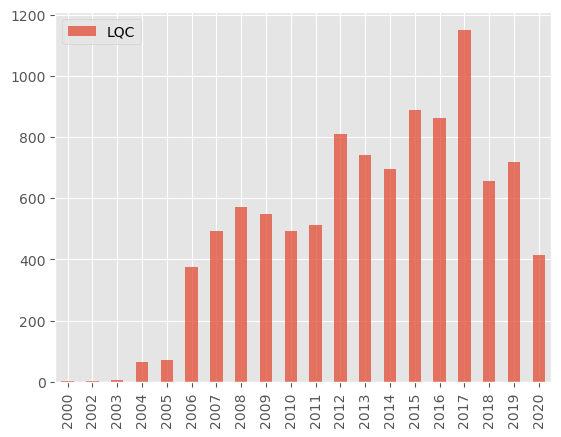

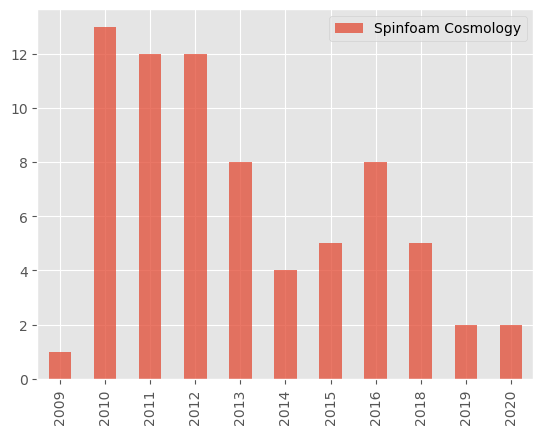

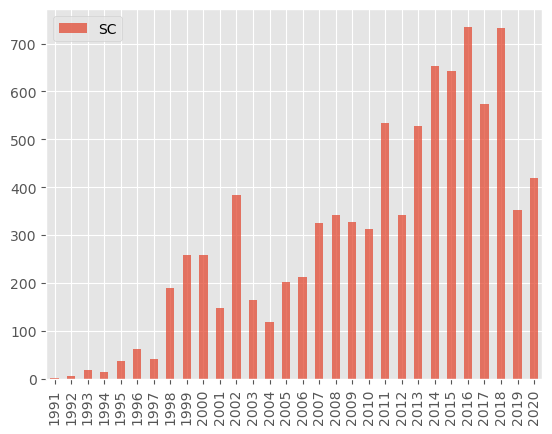

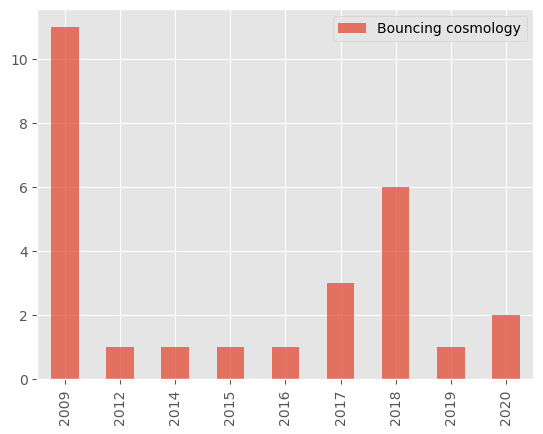

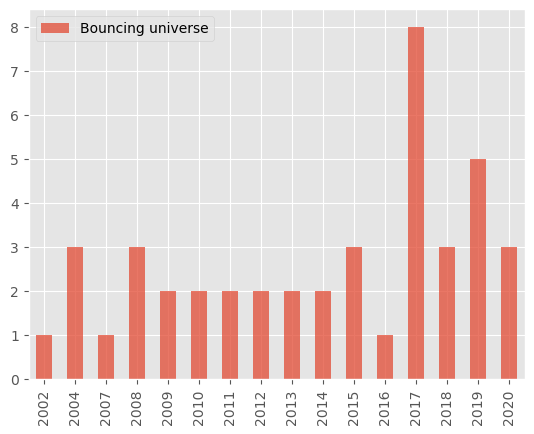

In [199]:
#this prints all visualizations for all the models
models = df2.iloc[:,6:37].columns.tolist()

for model in models:
    model_hist_flat(model)

#### this function shows the top 10 articles that discuss a given model - in this example I use Lee-Wick

In [116]:
def model_table1(model):
    dff = df2.loc[df2[model].notna()]
    dff[model] = dff[model].astype(int)
    b = dff.pivot_table(
        index = ['title'],
        values=[model],
        #fill_value=0,
        aggfunc=[np.sum],)
    print('The top 10 articles mentioning given model')
    print(b.sort_values([('sum', model)],axis=0,ascending=False).head(10))

In [117]:
model_table1('Lee-Wick')

The top 10 articles mentioning given model
                                                        sum
                                                   Lee-Wick
title                                                      
Causality as an emergent macroscopic phenomenon...       70
External Sources in Lee-Wick Theories                    44
One-Loop Renormalization of Lee-Wick Gauge Theory        38
Hosotani mechanism in higher dimensional Lee-Wi...       28
Instability of small AdS black holes in sixth-o...       24
TeV Scale Lee-Wick Fields out of Large Extra Di...       18
The process gg -> h_0 -> gamma gamma in the Lee...       18
Possible treatment of the Ghost states in the L...       16
Interparticle potential energy for D-dimensiona...       16
Constraints on the Lee-Wick Higgs Sector                 15


## 5. Generalize that to implement other models.

The code allows for that. all you need to do to see if a model appears (literally) in an article is to add that model or keyword into the dictionary

## 6. Presentation of the information

rather than a pie chart that is cluttered, as you mentioned, I think the clickable option on name of model is better. 

I have wrapped the tables and summaries into functions such that if you name the model, the function will provide information for said model. 

This way, whoever is making the website can make a reactive button that runs the function for model after that model is selected. plotly dash should work well for this. 



##### The following shows how many models are mentioned in each article and which row that article is in. for example, from this output we see that the second article mentions 2 models and we can then inspect that article.

In [118]:
df2.iloc[:,6:].notnull().sum(axis=1)

0       2
1       1
2       1
3       1
4       1
       ..
7150    1
7151    3
7152    4
7153    3
7154    1
Length: 7155, dtype: int64

if you want to see how many models are mentioned in the third article in the dataset you can run the code below. simply change the number 2 to the article number you want. (remember python starts iterating at 0 not 1).

In [119]:
print(df2.iloc[:,6:].notnull().sum(axis=1)[2])
print(df2.url[2])

1
http://arxiv.org/abs/astro-ph/9710185v2


we see that the article talks Lee-Wick 6 times

In [120]:
df2.loc[[1]].dropna(axis = 1)

cat                       authors             published  \
1  astro-ph  ['S. Kubis', 'M. Kutschera']  1996-03-23T13:33:00Z   

                                               title  \
1  Comment on "Brown Dwarfs, Quark Stars, and Qua...   

                                       url  \
1  http://arxiv.org/abs/astro-ph/9603126v1   

                                                text  Lee-Wick  
1                                                ...       6.0

### top 3 most recent and most cited articles for given model

In [121]:
model = 'Lee-Wick'

In [122]:
# Import the modules to open and reading URLs and the JSON encoder
import urllib.request, json

#top 3 most recent articles 
# Open the INSPIRE-HEP profile
inspirehep_profile = 'https://inspirehep.net/api/literature?sort=mostrecent&size=3&q=' + model


In [123]:
inspirehep_profile

'https://inspirehep.net/api/literature?sort=mostrecent&size=3&q=Lee-Wick'

In [124]:
# Load the data
data = json.loads(urllib.request.urlopen(inspirehep_profile).read())
#top 3

In [435]:
#print(data)

if you print data as shown in the cell above you can see what information inspire stores about the articles. there are several bibtex references in the json data and I'm not exactly sure what you guys need.


In [125]:
for i in range(3):
    title = data['hits']['hits'][i]['metadata']['titles'][0]['title']
    print(title)
#cits = data['hits']['hits'][0]['metadata']['citation_count']

Dirichlet boundary condition for the Lee-Wick-like scalar model
Axionlike Lee-Wick particles in light-shining-through-wall experiments
Non-perturbative unitarity and fictitious ghosts in quantum gravity


In [126]:
#top 3 most cited articles for model
inspirehep_profile = 'https://inspirehep.net/api/literature?sort=mostcited&size=3&q=' + model
data1 = json.loads(urllib.request.urlopen(inspirehep_profile).read())

In [127]:
for i in range(3):
    title = data1['hits']['hits'][i]['metadata']['titles'][0]['title']
    print(title)
    cits = data1['hits']['hits'][i]['metadata']['citation_count']
    print('number of citations: ' + str(cits))

CMS technical design report, volume II: Physics performance
number of citations: 1617
CMS Physics
number of citations: 1073
Vacuum Stability and Vacuum Excitation in a Spin 0 Field Theory
number of citations: 745


## 7. Where to store the data and the algorithm that would run daily?

the formula that checks if the model is mentioned in the article can be run from this notebook. 

it shouldn't take too long to run for thousands of articles on a good computer and I assume that not 1000s of articles get published on these topics every day... but I could be wrong! If performance is slow - try running on a better computer - you should be able to get sh access to one maybe through your company or university. 


if you want to add new data, you would use the api wrapper step from part 1 to grab the entries associated with the topics of your choice and verify that they are new by checking if the url is in the url column of your original dataset. there is a commented line that allows you to dump the data into a csv. just uncomment it and run it

Whoever is helping you with your website can get a better understanding of the size and how to embed the visualizations and data I have there